1. IMPORTING LIBRARIES

In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [81]:
df= pd.read_csv("C:/Users/user/Downloads/AIML Dataset.csv")

general information

In [82]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [84]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [85]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [86]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [87]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [88]:
df.shape

(6362620, 11)

In [89]:
# percentage of the fraud cases in the dataset.
round(df["isFraud"].value_counts()[1]/df.shape[0] * 100,2) 

0.13

In [90]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

visualization

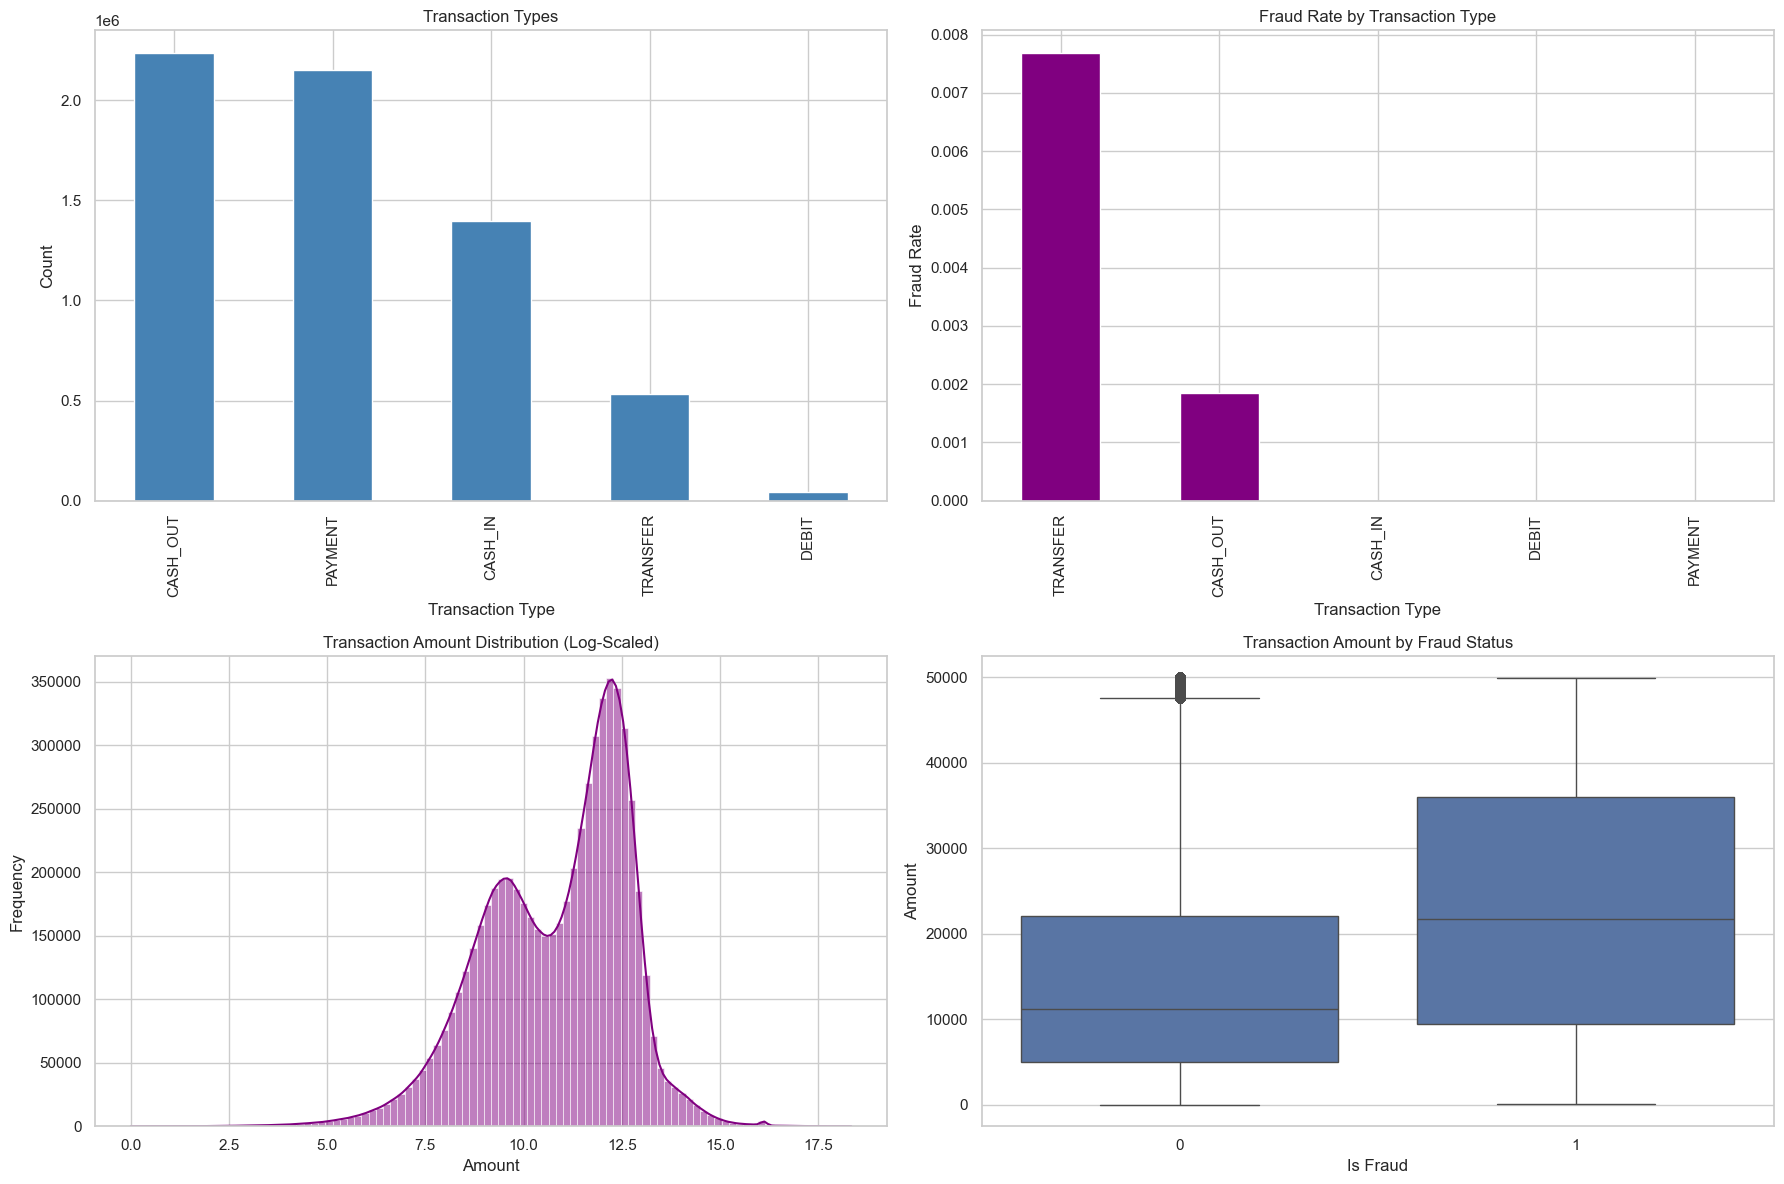

In [93]:
# data preparation for visualization
type_counts = df["type"].value_counts()
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

type_counts.plot(
    kind="bar",
    color="steelblue",
    ax=axes[0, 0],
    title="Transaction Types"
)
axes[0, 0].set_xlabel("Transaction Type")
axes[0, 0].set_ylabel("Count")

fraud_by_type.plot(
    kind="bar",
    color="purple",
    ax=axes[0, 1],
    title="Fraud Rate by Transaction Type"
)
axes[0, 1].set_xlabel("Transaction Type")
axes[0, 1].set_ylabel("Fraud Rate")

sns.histplot(
    np.log1p(df['amount']),
    bins=100,
    kde=True,
    color="purple",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Transaction Amount Distribution (Log-Scaled)")
axes[1, 0].set_xlabel("Amount")
axes[1, 0].set_ylabel("Frequency")

sns.boxplot(
    data=df[(df["amount"] > 0) & (df["amount"] < 50000)],
    x="isFraud",
    y="amount",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Transaction Amount by Fraud Status")
axes[1, 1].set_xlabel("Is Fraud")
axes[1, 1].set_ylabel("Amount")

plt.tight_layout()
plt.show()


In [94]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [95]:
df['balancedifforig']=df['oldbalanceOrg']-df['newbalanceOrig'] 
df['balancediffdest']=df['oldbalanceDest']-df['newbalanceDest']

print((df['balancedifforig'] < 0).sum())
print((df['balancediffdest'] < 0).sum())


1399253
2806464


In [96]:
top_senders=df['nameOrig'].value_counts().head(10).index
top_receivers=df['nameDest'].value_counts().head(10).index 
print("THE TOP SENDERS\n", top_senders)
print("THE TOP RECEIVERS\n", top_receivers)

THE TOP SENDERS
 Index(['C1902386530', 'C363736674', 'C545315117', 'C724452879', 'C1784010646',
       'C1677795071', 'C1462946854', 'C1999539787', 'C2098525306',
       'C400299098'],
      dtype='object', name='nameOrig')
THE TOP RECEIVERS
 Index(['C1286084959', 'C985934102', 'C665576141', 'C2083562754', 'C248609774',
       'C1590550415', 'C451111351', 'C1789550256', 'C1360767589',
       'C1023714065'],
      dtype='object', name='nameDest')


In [97]:
fraud_user=df[(df['isFraud']==1)] ["nameOrig"].value_counts().head(10)
fraud_user

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

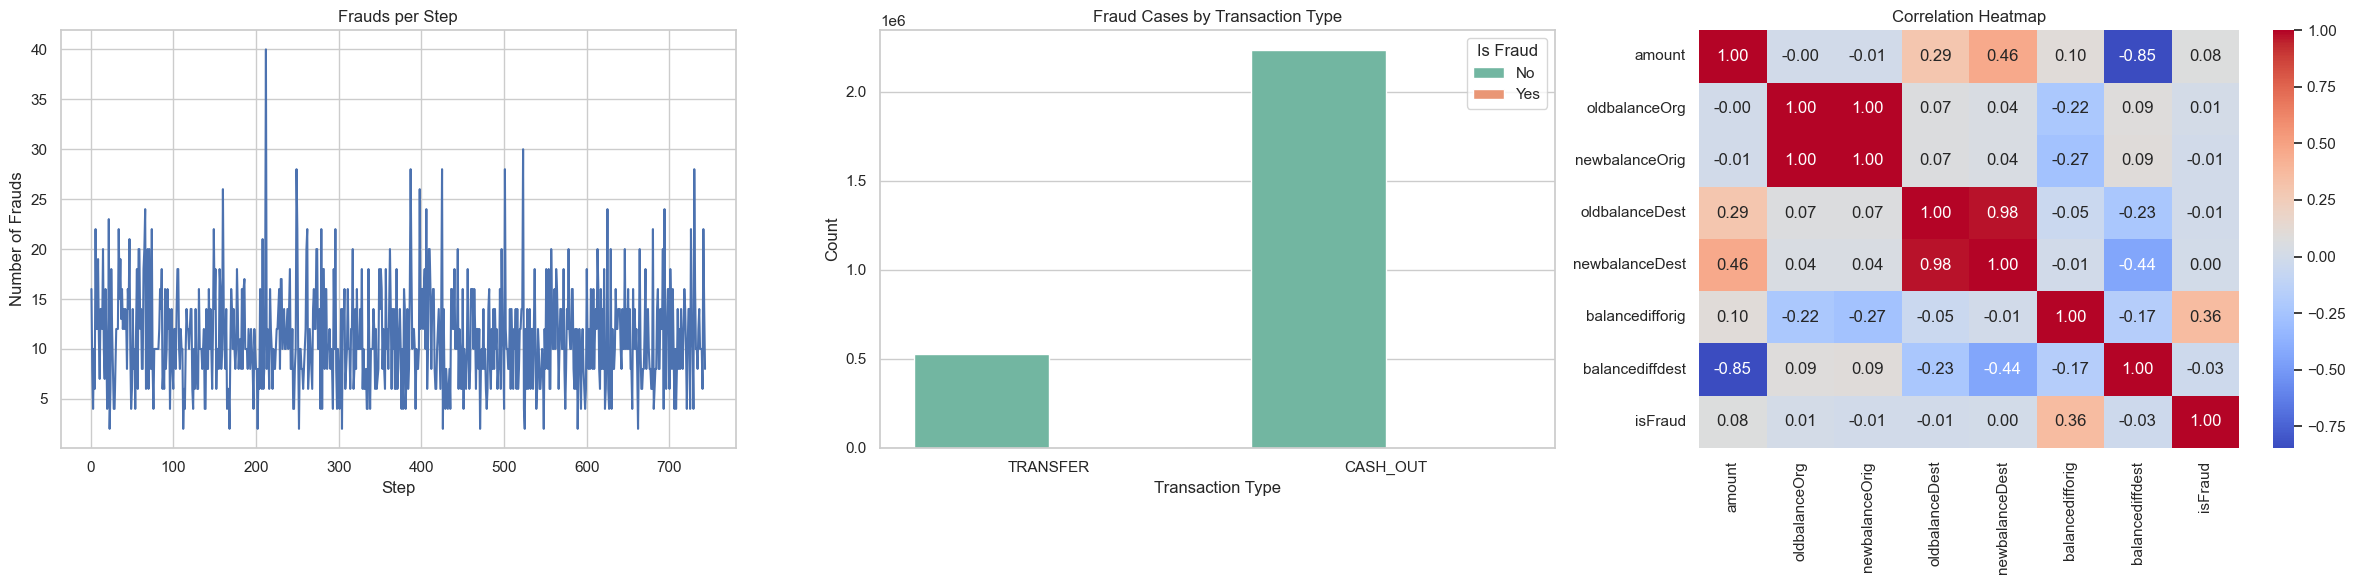

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64
                   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount           1.000000      -0.002762       -0.007861        0.294137   
oldbalanceOrg   -0.002762       1.000000        0.998803        0.066243   
newbalanceOrig  -0.007861       0.998803        1.000000        0.067812   
oldbalanceDest   0.294137       0.066243        0.067812        1.000000   
newbalanceDest   0.459304       0.042029        0.041837        0.976569   
balancedifforig  0.102337      -0.220297       -0.267750       -0.047460   
balancediffdest -0.845964       0.087032        0.094456       -0.232316   
isFraud          0.076688       0.010154       -0.008148       -0.005885   

                 newbalanceDest  balancedifforig  balancediffdest   isFraud  
amount                 0.459304         0.102337        -0.845964  0.076688  
oldbalanceOrg          0.042029        -0.220297         0.087032  0.010154  
newbalance

In [98]:

fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])][["type", "isFraud"]]
fraud_per_step = df[df["isFraud"] == 1].groupby("step").size().sort_index()


fig, axes = plt.subplots(1, 3, figsize=(24, 6))

axes[0].plot(fraud_per_step.index, fraud_per_step.values, label="Frauds per step")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Number of Frauds")
axes[0].set_title("Frauds per Step")
axes[0].grid(True)


sns.countplot(
    data=fraud_types,
    x="type",
    hue="isFraud",
    palette="Set2",
    ax=axes[1]
)
axes[1].set_title("Fraud Cases by Transaction Type")
axes[1].set_xlabel("Transaction Type")
axes[1].set_ylabel("Count")
axes[1].legend(title="Is Fraud", labels=["No", "Yes"])


corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest",
           "newbalanceDest","balancedifforig","balancediffdest","isFraud"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[2])
axes[2].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()

print(fraud_types["type"].value_counts())
print(corr)

In [99]:
zero_after_trasfer = df[
    (df['oldbalanceOrg'] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))
]
print(zero_after_trasfer.head())
len(zero_after_trasfer)

    step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2      1  TRANSFER     181.00  C1305486145          181.0             0.0   
3      1  CASH_OUT     181.00   C840083671          181.0             0.0   
15     1  CASH_OUT  229133.94   C905080434        15325.0             0.0   
19     1  TRANSFER  215310.30  C1670993182          705.0             0.0   
24     1  TRANSFER  311685.89  C1984094095        10835.0             0.0   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
2    C553264065             0.0            0.00        1               0   
3     C38997010         21182.0            0.00        1               0   
15   C476402209          5083.0        51513.44        0               0   
19  C1100439041         22425.0            0.00        0               0   
24   C932583850          6267.0      2719172.89        0               0   

    balancedifforig  balancediffdest  
2             181.0             0.00  
3 

1188074

2.FEATURE ENGINERING

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler   
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder    



In [101]:
df.head(    )

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedifforig,balancediffdest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [102]:
df.model=df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
df.model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balancedifforig,balancediffdest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [103]:
categorical= ['type']
numerics= [ 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceOrig']

y=df.model['isFraud']
X=df.model.drop('isFraud', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerics),
        ('cat', OneHotEncoder(drop = "first"), categorical),
       
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',LogisticRegression(class_weight='balanced'))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'newbalanceOrig']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [104]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.92      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.93      0.50   1908786
weighted avg       1.00      0.94      0.97   1908786



In [105]:
confusion_matrix (y_test, y_pred)

array([[1796196,  110126],
       [    208,    2256]], dtype=int64)

In [106]:
pipeline.score(X_test, y_test)*100

94.21967679980888

In [107]:
import joblib
joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']